### LHCOlympics2020

#### Source:
https://indico.cern.ch/event/809820/page/19002-lhcolympics2020

#### Git Repo for personal devs
https://github.com/ezeeEric/LHCOlymp

#### Files: 
* Contain List of all hadrons (up to 700)
* file structure: (pt,eta,phi)_hadron0, (pt,eta,phi)_hadron1, ...
##### Competition DS:
https://zenodo.org/record/3547722#.XdRG4r97naY
* Monte Carlo Simulation Background (no signal) - 1M events
* Data (3 black boxes infused with signal(s)) - first box 1M-1 events
* *Data description through simulation not ideal!*
##### Event selection:
* at least one anti-kT R = 1.0 jet (=fatjet)
* pseudorapidity |η| < 2.5 
* transverse momentum pT > 1.2 TeV

##### Jet reconstruction
* Fastjet library providing objects (through pyjet)
* antikt-algorithm used in initial setup
http://www.fastjet.fr/repo/doxygen-3.0.6/PseudoJet_8hh_source.html

##### for setup purposes only: benchmark dataset 
https://zenodo.org/record/2629073#.XeG1aTJKjOR
* 1M QCD dijet events and 100k W'->XY events, with X->jj and Y->jj
* W', X, and Y masses are 3.5 TeV, 500 GeV and 100 GeV 
##### Event selection:
* single fat-jet (R = 1.0) trigger with pT > 1.3 TeV
* sig/bg truth info included, otherwise same

#### Goal:
1. p-value associated with the dataset having no new particles (null hypothesis).
2. complete a description of the new physics as possible. (masses, decay modes, uncertainties).
3. How many signal events (+uncertainty) are in the dataset (before any selection criteria).

#### Submission:
See source. Deadline *Sunday, January 12, 2020* 

#### Unsorted Ressources
Searches with boosted objects at ATLAS and CMS
http://moriond.in2p3.fr/QCD/2018/TuesdayAfternoon/Moran.pdf


### Ideas/Remarks

#### General
* approach like analysis - categorisation? 
* and/or like black box ML with specific features?
* Specific data preparations needed?
* statistical evaluation
* (time)-efficicent run on all data
* interface to cedar

#### ML method
* how to choose?
* how to train without signal?

#### Possibly Important Features
* check similar jet based analyses
##### Jet Properties
* nr of hadrons in all jet, lead jet
* hadron content - pt sum, harder hadrons?
* jet multiplicity
* dijet mass, detajj, dphijj, drjj
* sum of jet pts in event
* jet mass of large R
* jet dR vs jet mass?
* substructure quantities? N-subjettiness, Ratio of Energy Correlation functions D2
* invariant mass highest pt objects
* ...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pickle

from tools import timelogDict,chronomat
from tools import calcMjj #,nHadPerJet
from dataPreparation import createJetCollections

##### Benchmark Dataset

In [4]:
nEvts=1000
fn =  'data/events_anomalydetection.h5'

# Option 2: Only load the first nEvts events for testing
df_test = pandas.read_hdf(fn, stop=nEvts)
f=df_test
events_combined = f.T
np.shape(events_combined)

allJets,leadJet = createJetCollections(events_combined,nEvts, truthBit=True)

background 0
background 100
background 200
background 300
background 400
background 500
background 600
background 700
background 800
background 900
signal 0
signal 100
signal 200
signal 300
signal 400
signal 500
signal 600
signal 700
signal 800
signal 900


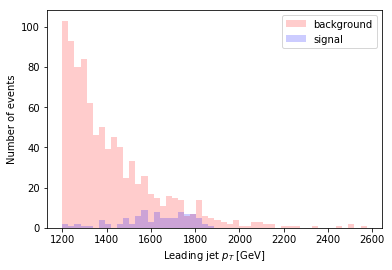

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadJet['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadJet['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

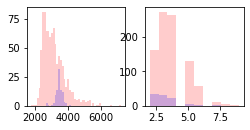

In [9]:
mjj=calcMjj(allJets)
nH=nHadPerJet(allJets)
fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
n,b,p = ax.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
ax.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
ax2 = fig.add_subplot(2, 3, 2)
n,b,p = ax2.hist(nH['background'], bins=10, facecolor='r', alpha=0.2,label='background')
ax2.hist(nH['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
# ax3 = fig.add_subplot(2, 3, 3)
# n,b,p = ax.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
# ax2.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
# ax2 = fig.add_subplot(2, 3, 4)
# ax2.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
ax.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

##### Competition DS

In [3]:
nEvts=10000
fn_bg =  '../data/events_LHCO2020_backgroundMC_Pythia.h5'

# Option 2: Only load the first nEvts events for testing
df_bg = pandas.read_hdf(fn_bg, stop=nEvts)
print(df_bg.shape)

(10000, 2100)


In [4]:
bgEvts_comb = df_bg.T

allJets_bg,leadJet_bg=createJetCollections(bgEvts_comb,nEvts, truthBit=False, dataLabel="background")

background 0
background 1000
background 2000
background 3000
background 4000
background 5000
background 6000
background 7000
background 8000
background 9000


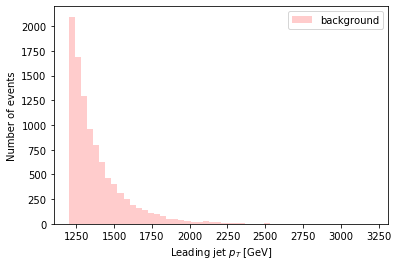

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadJet_bg['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

In [6]:
nEvts=10000
fn_data =  '../data/events_LHCO2020_BlackBox1.h5'

# Option 2: Only load the first nEvts events for testing
df_data = pandas.read_hdf(fn_data, stop=nEvts)
print(df_data.shape)

(10000, 2100)


In [7]:
dataEvts_comb = df_data.T

allJets_data,leadJet_data=createJetCollections(dataEvts_comb,nEvts, truthBit=False, dataLabel="data")

data 0
data 1000
data 2000
data 3000
data 4000
data 5000
data 6000
data 7000
data 8000
data 9000


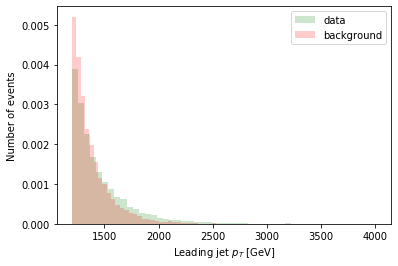

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadJet_data['data'], bins=50, facecolor='g', alpha=0.2,label='data',density=1.)
plt.hist(leadJet_bg['background'], bins=50, facecolor='r', alpha=0.2,label='background',density=1.)
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()